# 2D Diffusion Simulation

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

N: population is N \
Pop: positions of the population (Pop is an array of length N recording the position of every individual) \
L: number of grids is $L^2$ (we devide the 2D space into LxL grids) \
T: total timestamps \
PlotPerT: display the distribution plot every PlotPerT \
D: density (D is a matrix of size LxL where $D[i][j]$ shows the population in grid (i,j))

In [2]:
N = 20000
L =  11
Pop = [[L//2,L//2] for i in range(N)]
T = 1000
PlotPerT = 200

In [3]:
# Plot the current density
def DensityPlot(D):
    im = plt.imshow(D, cmap="copper_r")
    plt.colorbar(im)
    plt.show()
    return

In [4]:
# Boundary Check Functions

# the leftmost go left is the rightmost, the rightmost go right is the leftmost
def periodic_boundary(pos, L):
    # First check vertically
    if pos[0]<0:
        pos[0] = L-1
    elif pos[0] == L:
        pos[0] = 0
    # Check horizontally
    if pos[1]<0:
        pos[1] = L-1
    elif pos[1] == L:
        pos[1] = 0
    return pos

# the leftmost go left or the rightmost go right => stay at the boundary for this timestamp
def reflective_boundary(pos, L):
    # First check vertically
    if pos[0]<0:
        pos[0] = 0
    elif pos[0] == L:
        pos[0] = L-1
    # Check horizontally
    if pos[1]<0:
        pos[1] = 0
    elif pos[1] == L:
        pos[1] = L-1
    return pos

In [5]:
# Monte Carlo Simulation of the random motion of individuals
# Input: current positions
# Output: the new positions at the next timestamp
def RandomWalk(Pop, L):
    for i in range(len(Pop)):
        rand_move = random.random()
        # Go Up
        if rand_move < 0.2:
            Pop[i][0] -= 1
        # Go Down
        elif rand_move < 0.4:
            Pop[i][0] += 1
        # Go Left
        elif rand_move < 0.6:
            Pop[i][1] -= 1
        # Go Right
        elif rand_move < 0.8:
            Pop[i][1] += 1
        # Stay
        else:
            Pop[i][1] += 0
        Pop[i] = periodic_boundary(Pop[i], L)
    return Pop 

In [6]:
def DiffusionSimulation(L, Pop, T, PlotPerT):
    for t in range(T):
        # For every time stamp, we first calculate the current density
        D = np.zeros((L, L))
        for x in Pop:
            D[x[0]][x[1]] += 1
        # Plot the distribution
        if t in range(10) or t%PlotPerT == 0:
            print('Timestamp:',t)
            DensityPlot(D)
        # Perform random movement
        Pop = RandomWalk(Pop, L) 
        
    print('Timestamp:', T)
    DensityPlot(D)

Timestamp: 0


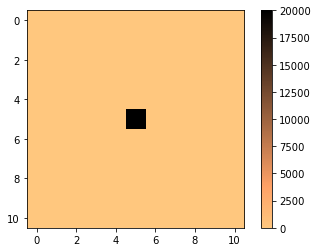

Timestamp: 1


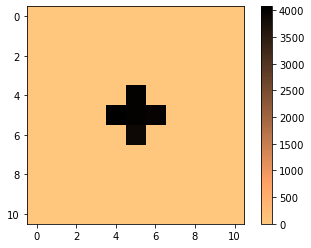

Timestamp: 2


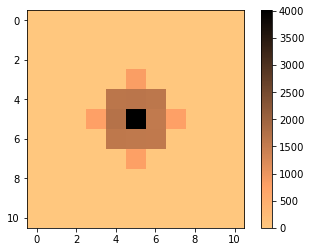

Timestamp: 3


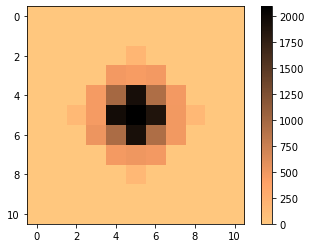

Timestamp: 4


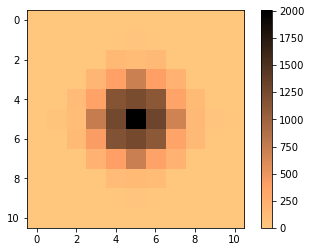

Timestamp: 5


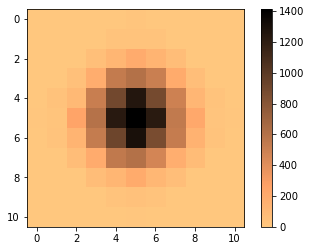

Timestamp: 6


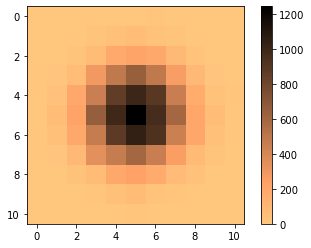

Timestamp: 7


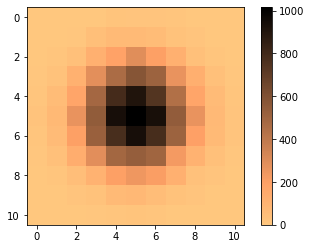

Timestamp: 8


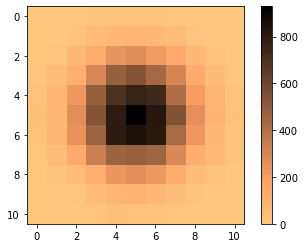

Timestamp: 9


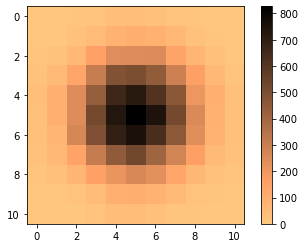

Timestamp: 200


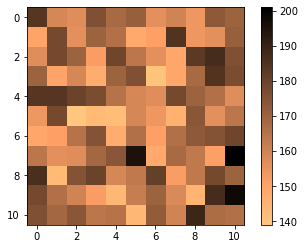

Timestamp: 400


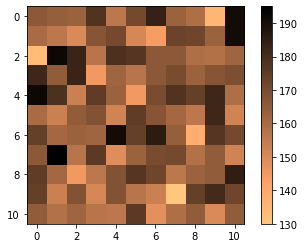

Timestamp: 600


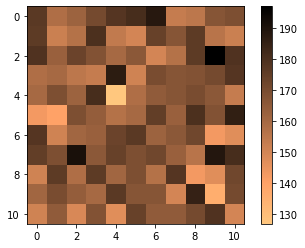

Timestamp: 800


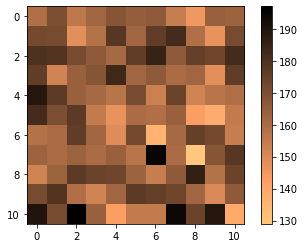

Timestamp: 1000


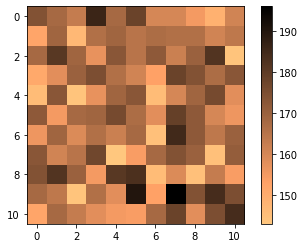

In [7]:
DiffusionSimulation(L, Pop, T, PlotPerT)